### Color Classification Quadratic Problem - Keras NN

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
from tensorflow import keras
import pandas as pd

In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

In [3]:
np.random.shuffle(train_data.values)
np.random.shuffle(test_data.values)

In [4]:
train_data.head(10)

,x,y,color
0,-2.077266,2.864001,1.0
1,-2.112333,5.966759,0.0
2,-0.846855,-1.028841,1.0
3,2.125461,6.298257,0.0
4,1.087695,2.434352,0.0
5,1.476535,3.982583,0.0
6,-4.291696,19.746244,0.0
7,-2.625508,8.736214,0.0
8,-4.667122,22.902436,0.0
9,1.187530,2.874615,0.0


In [23]:
X_train = train_data[:].values[:, :2]
y_train = train_data[:].values[:, -1].reshape((-1, 1)).astype(np.float32)
X_test = test_data[:].values[:, :2]
y_test = test_data[:].values[:, -1]


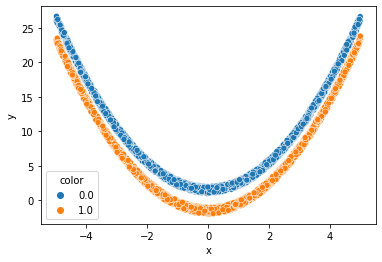

In [24]:
sns.scatterplot(data=train_data, x='x', y='y', hue='color')
plt.show()

### Model creation

In [65]:
model = keras.Sequential([
    keras.layers.Dense(64, input_shape=(2, ), activation="relu"),
    keras.layers.Dense(16, activation=keras.activations.relu),
    keras.layers.Dense(2, activation="softmax")
])

In [68]:
model.compile(optimizer='adam',
             loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True, ),
             metrics=["accuracy"])

In [69]:
model.fit(X_train, y_train, batch_size=5, epochs=10)

Epoch 1/10
800/800 [==============================] - 2s 1ms/step - loss: 0.0260 - accuracy: 0.9899
Epoch 2/10
800/800 [==============================] - 1s 1ms/step - loss: 0.0727 - accuracy: 0.9795
Epoch 3/10
800/800 [==============================] - 1s 1ms/step - loss: 0.0052 - accuracy: 0.9999
Epoch 4/10
800/800 [==============================] - 1s 1ms/step - loss: 0.0222 - accuracy: 0.9950
Epoch 5/10
800/800 [==============================] - 1s 1ms/step - loss: 0.0385 - accuracy: 0.9868
Epoch 6/10
800/800 [==============================] - 1s 1ms/step - loss: 0.0273 - accuracy: 0.9921
Epoch 7/10
800/800 [==============================] - 1s 1ms/step - loss: 0.0068 - accuracy: 0.9989
Epoch 8/10
800/800 [==============================] - 1s 1ms/step - loss: 0.0261 - accuracy: 0.9938
Epoch 9/10
800/800 [==============================] - 1s 1ms/step - loss: 0.0183 - accuracy: 0.9962
Epoch 10/10
800/800 [==============================] - 1s 1ms/step - loss: 0.0127 - accuracy: 0.9976

In [71]:
model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 1ms/step - loss: 0.0060 - accuracy: 0.9970


[0.006027990486472845, 0.996999979019165]

In [80]:
np.argmax((model.predict([list(X_test[0])]))), y_test[0]

(1, 1.0)

> done